# Employee attrition prediction

## Problem Statement: To predict if a person is going to leave the company or going to stay in it.
### Data Description:
1. 'status' – Current employment status (Employed / Left)
2. 'department' – Department employees belong(ed) to
3. 'salary' – Salary level relative to rest of their department
4. 'tenure' – Number of years at the company
5. 'recently_promoted' – Was the employee promoted in the last 3 years?
6. 'n_projects' – Number of projects employee is staffed on
7. 'avg_monthly_hrs' – Average number of hours worked per month
8. 'satisfaction' – Score for employee’s satisfaction with the company (higher is better)
9. 'last_evaluation' – Score for most recent evaluation of employee (higher is better)
10. 'filed_complaint' – Has the employee filed a formal complaint in the last 3 years?



### Importing required packages

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading .csv file
data=pd.read_csv('../input/predicting-employee-status/employee_data (1).csv')

In [3]:
data.head()#getting top 5 rows of our dataframe

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [4]:
data.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [5]:
data.describe(include='all')#getting all summary statistics of our data

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
count,14249.000000,13540,2058.0,12717.000000,14249.000000,300.0,14249,14068.000000,14249,14068.000000
unique,NaN,12,NaN,NaN,NaN,NaN,3,NaN,2,NaN
top,NaN,sales,NaN,NaN,NaN,NaN,low,NaN,Employed,NaN
freq,NaN,3923,NaN,NaN,NaN,NaN,6952,NaN,10857,NaN
mean,199.795775,NaN,1.0,0.718477,3.773809,1.0,NaN,0.621295,NaN,3.497228
std,50.998714,NaN,0.0,0.173062,1.253126,0.0,NaN,0.250469,NaN,1.460917
min,49.000000,NaN,1.0,0.316175,1.000000,1.0,NaN,0.040058,NaN,2.000000
25%,155.000000,NaN,1.0,0.563866,3.000000,1.0,NaN,0.450390,NaN,3.000000
50%,199.000000,NaN,1.0,0.724939,4.000000,1.0,NaN,0.652527,NaN,3.000000
75%,245.000000,NaN,1.0,0.871358,5.000000,1.0,NaN,0.824951,NaN,4.000000


In [6]:
data.isnull().sum()#finding number of null values in individual column

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [7]:
data.status.value_counts()#getting count of different classes in a column 

Employed    10857
Left         3392
Name: status, dtype: int64

Text(0.5, 1.0, 'status distribution')

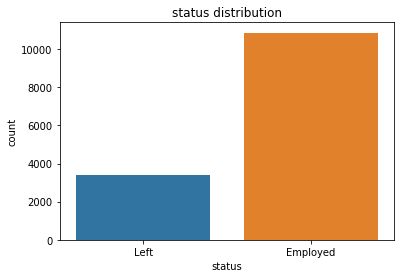

In [8]:
sns.countplot(x='status',data=data)
plt.title('status distribution')

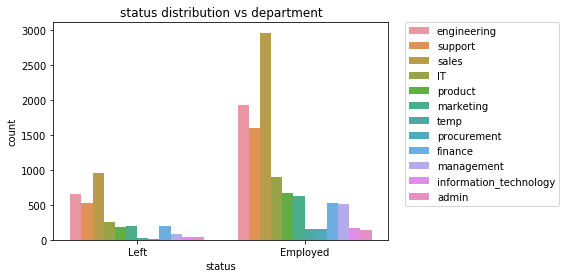

In [9]:
sns.countplot(x='status',data=data,hue='department')
plt.title('status distribution vs department')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [10]:
data.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [13]:
#creating a function which splits a dataframe into train,validation and test
def split_x(df):
    train,test=train_test_split(df,test_size=0.3,random_state=1)
    val,test=train_test_split(test,test_size=0.5,random_state=1)
    return train,val,test

In [14]:
#splitting data in train,validation and test
train,val,test=split_x(data)
print('train shape:',train.shape,'\n','val shape:',val.shape,'\n','test shape:',test.shape,'\n')

train shape: (9974, 10) 
 val shape: (2137, 10) 
 test shape: (2138, 10) 



In [15]:
train.describe(include='all')

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
count,9974.000000,9474,1457.0,8896.000000,9974.000000,211.0,9974,9863.000000,9974,9863.00000
unique,NaN,12,NaN,NaN,NaN,NaN,3,NaN,2,NaN
top,NaN,sales,NaN,NaN,NaN,NaN,low,NaN,Employed,NaN
freq,NaN,2732,NaN,NaN,NaN,NaN,4864,NaN,7625,NaN
mean,200.084319,NaN,1.0,0.716819,3.780630,1.0,NaN,0.622162,NaN,3.50218
std,50.978320,NaN,0.0,0.173019,1.249246,0.0,NaN,0.250695,NaN,1.46803
min,49.000000,NaN,1.0,0.316175,1.000000,1.0,NaN,0.040058,NaN,2.00000
25%,155.000000,NaN,1.0,0.562545,3.000000,1.0,NaN,0.450388,NaN,3.00000
50%,199.000000,NaN,1.0,0.722599,4.000000,1.0,NaN,0.654686,NaN,3.00000
75%,245.000000,NaN,1.0,0.868999,5.000000,1.0,NaN,0.825367,NaN,4.00000


In [16]:
val.describe(include='all')

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
count,2137.000000,2035,305.0,1907.000000,2137.000000,36.0,2137,2102.000000,2137,2102.000000
unique,NaN,12,NaN,NaN,NaN,NaN,3,NaN,2,NaN
top,NaN,sales,NaN,NaN,NaN,NaN,low,NaN,Employed,NaN
freq,NaN,599,NaN,NaN,NaN,NaN,1023,NaN,1614,NaN
mean,199.345344,NaN,1.0,0.726837,3.789424,1.0,NaN,0.619622,NaN,3.490961
std,51.052780,NaN,0.0,0.173040,1.262622,0.0,NaN,0.249816,NaN,1.436806
min,67.000000,NaN,1.0,0.344034,1.000000,1.0,NaN,0.044844,NaN,2.000000
25%,155.000000,NaN,1.0,0.570461,3.000000,1.0,NaN,0.452653,NaN,3.000000
50%,199.000000,NaN,1.0,0.737771,4.000000,1.0,NaN,0.644316,NaN,3.000000
75%,244.000000,NaN,1.0,0.881876,5.000000,1.0,NaN,0.821715,NaN,4.000000


In [17]:
#getting percentage of missing values in each column
round(train.isnull().sum()/len(train)*100,2)

avg_monthly_hrs       0.00
department            5.01
filed_complaint      85.39
last_evaluation      10.81
n_projects            0.00
recently_promoted    97.88
salary                0.00
satisfaction          1.11
status                0.00
tenure                1.11
dtype: float64

In [18]:
print('percent of null values in department:',round(train.department.isnull().sum()/len(train)*100,2),'%')

percent of null values in department: 5.01 %


In [19]:
train.department.isnull().sum()

500

In [20]:
train.department.value_counts()

sales                     2732
engineering               1829
support                   1473
IT                         835
product                    607
marketing                  567
finance                    507
management                 416
information_technology     149
procurement                124
admin                      124
temp                       111
Name: department, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

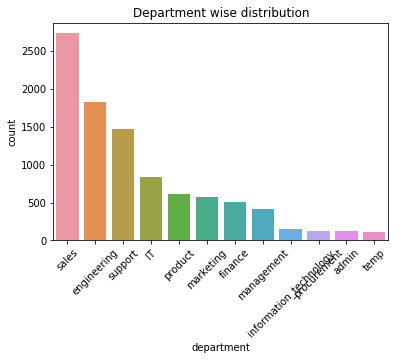

In [21]:
sns.countplot(x='department',data=train,order=train.department.value_counts().index)
plt.title('Department wise distribution')
plt.xticks(rotation=45)

In [22]:
#after complete examination of data creating a single function to fill all na's in a dataframe
def fill_all_na(df):
    #creating a new department 'No_dept'(not sure about what to impute it with)...later will create a categorical column
    df.department.fillna(value='No_dept',axis=0,inplace=True)
    df.filed_complaint.fillna(value=0,axis=0,inplace=True)#filling na's with 0...beacuse most probably people will not file a complaint.
    df.last_evaluation.fillna(value=0.716819,axis=0,inplace=True)#filling with the mean
    df.recently_promoted.fillna(value=0,axis=0,inplace=True)#filling na's with 0
    df.satisfaction.fillna(value=0.622162,axis=0,inplace=True)
    df.tenure.fillna(value=3.50218,axis=0,inplace=True)
    return df

In [23]:
train=fill_all_na(train)
val=fill_all_na(val)
test=fill_all_na(test)
train.describe(include='all')

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
count,9974.000000,9974,9974.000000,9974.000000,9974.000000,9974.000000,9974,9974.000000,9974,9974.000000
unique,NaN,13,NaN,NaN,NaN,NaN,3,NaN,2,NaN
top,NaN,sales,NaN,NaN,NaN,NaN,low,NaN,Employed,NaN
freq,NaN,2732,NaN,NaN,NaN,NaN,4864,NaN,7625,NaN
mean,200.084319,NaN,0.146080,0.716819,3.780630,0.021155,NaN,0.622162,NaN,3.502180
std,50.978320,NaN,0.353204,0.163401,1.249246,0.143908,NaN,0.249296,NaN,1.459837
min,49.000000,NaN,0.000000,0.316175,1.000000,0.000000,NaN,0.040058,NaN,2.000000
25%,155.000000,NaN,0.000000,0.579546,3.000000,0.000000,NaN,0.453042,NaN,3.000000
50%,199.000000,NaN,0.000000,0.716819,4.000000,0.000000,NaN,0.650784,NaN,3.000000
75%,245.000000,NaN,0.000000,0.854444,5.000000,0.000000,NaN,0.823743,NaN,4.000000


In [24]:
round(train.isnull().sum()/len(train)*100,2)

avg_monthly_hrs      0.0
department           0.0
filed_complaint      0.0
last_evaluation      0.0
n_projects           0.0
recently_promoted    0.0
salary               0.0
satisfaction         0.0
status               0.0
tenure               0.0
dtype: float64

In [25]:
train.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [28]:
#creating a function to convert few variables in categorical type.
def into_category(df):
    cols=['department','filed_complaint','recently_promoted','salary','status']
    df[cols]=df[cols].astype('category')
    return df

In [29]:
train=into_category(train)
val=into_category(val)
test=into_category(test)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [30]:
train.dtypes

avg_monthly_hrs         int64
department           category
filed_complaint      category
last_evaluation       float64
n_projects              int64
recently_promoted    category
salary               category
satisfaction          float64
status               category
tenure                float64
dtype: object

In [31]:
#creating a new columnn 'No_dept' which gives a value 1 if a row in department column has a string 'No_dept'
#else 0....it is to give 
def new_col(df):
    df['no_dept']=[1 if x=='No_dept' else 0 for x in df['department']]
    df['no_dept']=df['no_dept'].astype('category')
    return df

In [32]:
train=new_col(train)
val=new_col(val)
test=new_col(test)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [33]:
train.dtypes

avg_monthly_hrs         int64
department           category
filed_complaint      category
last_evaluation       float64
n_projects              int64
recently_promoted    category
salary               category
satisfaction          float64
status               category
tenure                float64
no_dept              category
dtype: object

In [34]:
train.describe(include='all')

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,no_dept
count,9974.000000,9974,9974.0,9974.000000,9974.000000,9974.0,9974,9974.000000,9974,9974.000000,9974.0
unique,NaN,13,2.0,NaN,NaN,2.0,3,NaN,2,NaN,2.0
top,NaN,sales,0.0,NaN,NaN,0.0,low,NaN,Employed,NaN,0.0
freq,NaN,2732,8517.0,NaN,NaN,9763.0,4864,NaN,7625,NaN,9474.0
mean,200.084319,NaN,NaN,0.716819,3.780630,NaN,NaN,0.622162,NaN,3.502180,NaN
std,50.978320,NaN,NaN,0.163401,1.249246,NaN,NaN,0.249296,NaN,1.459837,NaN
min,49.000000,NaN,NaN,0.316175,1.000000,NaN,NaN,0.040058,NaN,2.000000,NaN
25%,155.000000,NaN,NaN,0.579546,3.000000,NaN,NaN,0.453042,NaN,3.000000,NaN
50%,199.000000,NaN,NaN,0.716819,4.000000,NaN,NaN,0.650784,NaN,3.000000,NaN
75%,245.000000,NaN,NaN,0.854444,5.000000,NaN,NaN,0.823743,NaN,4.000000,NaN


Text(0.5, 1.0, 'status vs satisfaction')

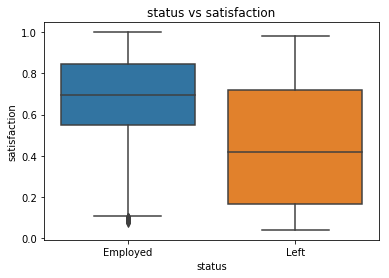

In [35]:
sns.boxplot(x='status',data=train,y='satisfaction')
plt.title('status vs satisfaction')
#observations
#people who leave are usually less satisfied of their job(role)

Text(0.5, 1.0, 'status vs avg_monthly_hrs')

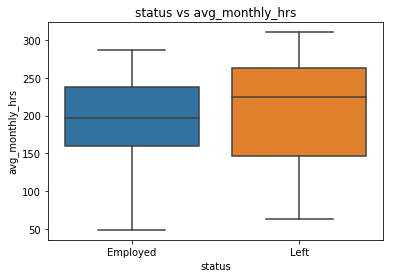

In [36]:
sns.boxplot(x='status',y='avg_monthly_hrs',data=train)  
plt.title('status vs avg_monthly_hrs')
#apart of not being satisfied they work for more hours than other employees.

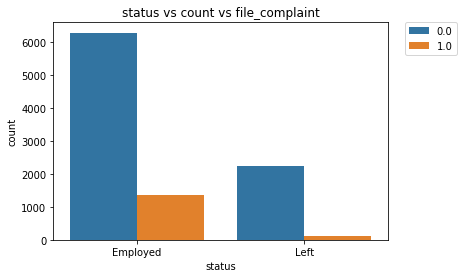

In [37]:
sns.countplot(x='status',data=train,hue='filed_complaint')
plt.title('status vs count vs file_complaint')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 1.0, 'status vs last_evaluation')

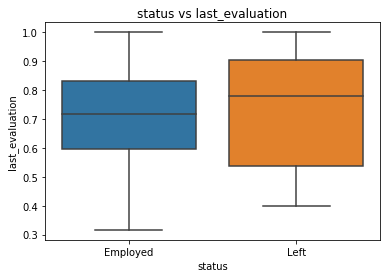

In [38]:
sns.boxplot(x='status',data=train,y='last_evaluation')
plt.title('status vs last_evaluation')
#people who left the company usually scored more than those in the company.

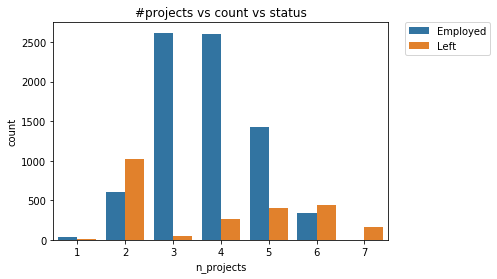

In [39]:
sns.countplot(x='n_projects',data=train,hue='status')
plt.title('#projects vs count vs status')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 1.0, '#projects vs last_evaluation vs status')

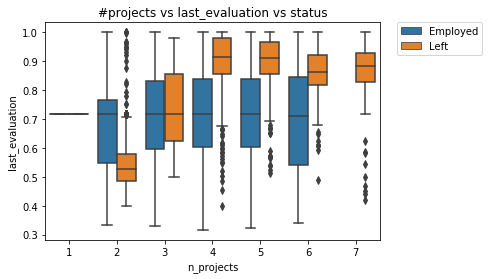

In [40]:
sns.boxplot(x='n_projects',data=train,y='last_evaluation',hue='status')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('#projects vs last_evaluation vs status')

Text(0.5, 1.0, 'recently promoted vs last_evaluation vs status')

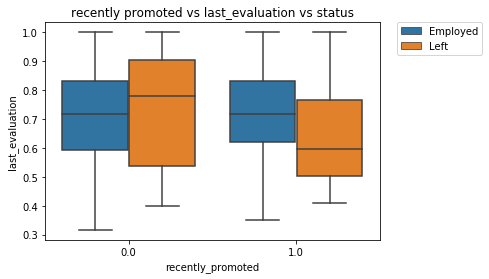

In [41]:
sns.boxplot(x='recently_promoted',data=train,y='last_evaluation',hue='status')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('recently promoted vs last_evaluation vs status')

Text(0.5, 1.0, 'salary vs last_evaluation vs status')

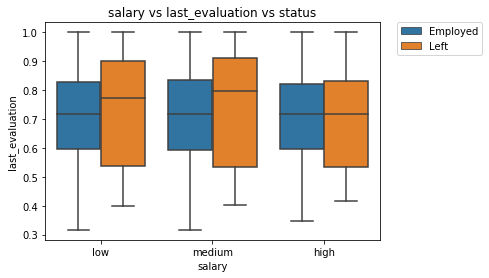

In [42]:
sns.boxplot(x='salary',data=train,y='last_evaluation',hue='status',order=['low','medium','high'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('salary vs last_evaluation vs status')

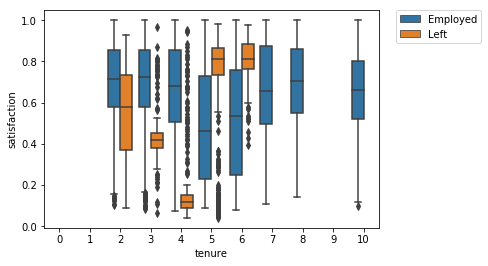

In [43]:
sns.boxplot(x='tenure',data=train,y='satisfaction',hue='status',order=[0,1,2,3,4,5,6,7,8,9,10])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



In [44]:
#function to split data into predictors and targets
def splitting_y(df):
  df_x=df.loc[:,df.columns!='status']
  df_y=df['status']
  return df_x,df_y

In [45]:
train_x,train_y=splitting_y(train)
val_x,val_y=splitting_y(val)
test_x,test_y=splitting_y(test)

In [46]:
train_x.describe(include='all')

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,no_dept
count,9974.000000,9974,9974.0,9974.000000,9974.000000,9974.0,9974,9974.000000,9974.000000,9974.0
unique,NaN,13,2.0,NaN,NaN,2.0,3,NaN,NaN,2.0
top,NaN,sales,0.0,NaN,NaN,0.0,low,NaN,NaN,0.0
freq,NaN,2732,8517.0,NaN,NaN,9763.0,4864,NaN,NaN,9474.0
mean,200.084319,NaN,NaN,0.716819,3.780630,NaN,NaN,0.622162,3.502180,NaN
std,50.978320,NaN,NaN,0.163401,1.249246,NaN,NaN,0.249296,1.459837,NaN
min,49.000000,NaN,NaN,0.316175,1.000000,NaN,NaN,0.040058,2.000000,NaN
25%,155.000000,NaN,NaN,0.579546,3.000000,NaN,NaN,0.453042,3.000000,NaN
50%,199.000000,NaN,NaN,0.716819,4.000000,NaN,NaN,0.650784,3.000000,NaN
75%,245.000000,NaN,NaN,0.854444,5.000000,NaN,NaN,0.823743,4.000000,NaN


In [47]:
train_x.dtypes

avg_monthly_hrs         int64
department           category
filed_complaint      category
last_evaluation       float64
n_projects              int64
recently_promoted    category
salary               category
satisfaction          float64
tenure                float64
no_dept              category
dtype: object

In [48]:
#creating list of numerical and categorical columns
num_cols=['avg_monthly_hrs','last_evaluation','n_projects','satisfaction','tenure']
cat_cols=['department','filed_complaint','recently_promoted','salary','no_dept']

In [49]:
#creating numerical and categorical dataframes for train,validation and test
train_num_x=train_x.loc[:,num_cols]
train_cat_x=train_x.loc[:,cat_cols]
val_num_x=val_x.loc[:,num_cols]
val_cat_x=val_x.loc[:,cat_cols]
test_num_x=test_x.loc[:,num_cols]
test_cat_x=test_x.loc[:,cat_cols]

In [50]:
#standardizing the numerical columns using standardscaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_num_x[train_num_x.columns])
train_num_x[train_num_x.columns] = scaler.transform(train_num_x[train_num_x.columns])
val_num_x[val_num_x.columns] = scaler.transform(val_num_x[val_num_x.columns])
test_num_x[test_num_x.columns] = scaler.transform(test_num_x[test_num_x.columns])

In [51]:
#creating dummy variables of categorical variables
train_dummy_x=pd.get_dummies(train_cat_x,drop_first=True)
val_dummy_x=pd.get_dummies(val_cat_x,drop_first=True)
test_dummy_x=pd.get_dummies(test_cat_x,drop_first=True)

In [52]:
#combining standardized numerical dataframe and dummyfied categorical dataframe.
full_train_x=pd.concat([train_num_x,train_dummy_x],axis=1)
full_val_x=pd.concat([val_num_x,val_dummy_x],axis=1)
full_test_x=pd.concat([test_num_x,test_dummy_x],axis=1)

In [53]:
full_train_x.describe(include='all')

,avg_monthly_hrs,last_evaluation,n_projects,satisfaction,tenure,department_No_dept,department_admin,department_engineering,department_finance,department_information_technology,...,department_procurement,department_product,department_sales,department_support,department_temp,filed_complaint_1.0,recently_promoted_1.0,salary_low,salary_medium,no_dept_1
count,9.974000e+03,9.974000e+03,9.974000e+03,9.974000e+03,9.974000e+03,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,...,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000
mean,1.479110e-16,1.829965e-17,-1.019615e-17,6.134388e-17,2.537684e-16,0.050130,0.012432,0.183377,0.050832,0.014939,...,0.012432,0.060858,0.273912,0.147684,0.011129,0.146080,0.021155,0.487668,0.429316,0.050130
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.218225,0.110811,0.386995,0.219666,0.121314,...,0.110811,0.239082,0.445987,0.354804,0.104910,0.353204,0.143908,0.499873,0.495003,0.218225
min,-2.963846e+00,-2.452034e+00,-2.225958e+00,-2.335110e+00,-1.029057e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.844265e-01,-8.401432e-01,-6.249120e-01,-6.784253e-01,-3.440144e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.127127e-02,2.111728e-06,1.756110e-01,1.148152e-01,-3.440144e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.811183e-01,8.422977e-01,9.761340e-01,8.086434e-01,3.410278e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2.156234e+00,1.733135e+00,2.577180e+00,1.515697e+00,4.451282e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
full_val_x.isnull().sum()
#no null values are present

avg_monthly_hrs                      0
last_evaluation                      0
n_projects                           0
satisfaction                         0
tenure                               0
department_No_dept                   0
department_admin                     0
department_engineering               0
department_finance                   0
department_information_technology    0
department_management                0
department_marketing                 0
department_procurement               0
department_product                   0
department_sales                     0
department_support                   0
department_temp                      0
filed_complaint_1.0                  0
recently_promoted_1.0                0
salary_low                           0
salary_medium                        0
no_dept_1                            0
dtype: int64

## modelling

## KNN-(Kneighbour classification)

In [55]:
#importing required packages for model building
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [56]:
knn=KNeighborsClassifier()
param_grid_knn_1={
    'n_neighbors':np.arange(3,15,1),
    'weights':['uniform','distance'],
    'algorithm':['auto','brute'],
}
knn_random=RandomizedSearchCV(estimator=knn,param_distributions=param_grid_knn_1,n_iter=1000,n_jobs=-1,cv=5,verbose=1)

In [57]:
knn_random.fit(full_train_x,train_y)#training knn algorithm

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 48 is smaller than n_iter=1000. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=1000, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'brute'],
                                        'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=1)

In [58]:
knn_random.best_params_#getting best performing hyperparameters

{'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}

In [59]:
#using grid search to search for best parameters around the output of random search parameters
param_grid_knn2={
    'n_neighbors':np.arange(2,10,1),
    'weights':['uniform','distance'],
    'algorithm':['auto','brute'],
}

In [60]:
knn_grid=GridSearchCV(estimator=knn,param_grid=param_grid_knn2,n_jobs=-1,cv=5,verbose=1)

In [61]:
#training knn model with grid search
knn_grid.fit(full_train_x,train_y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   43.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'brute'],
                         'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [62]:
knn_grid.best_params_#best parameters of grid search are similar to random search

{'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}

## function to create learning curves to see bias and variance of models

In [63]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [64]:
knn2=KNeighborsClassifier(algorithm= 'auto', n_neighbors= 2, weights= 'uniform')

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

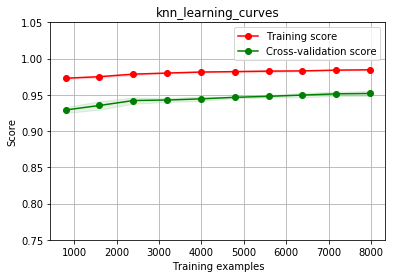

In [65]:
#learning curves for knn
plot_learning_curve(estimator=knn2,title='knn_learning_curves',X=full_train_x,y=train_y,ylim=(0.75,1.05),cv=5)

In [66]:
#learning seems to be good we will train knn with best parameters
knn2.fit(full_train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [67]:
#predicting the validation labels 
knn_prediction_val=knn2.predict(full_val_x)

In [68]:
#classification report to get all important metrics required for classification
from sklearn.metrics import classification_report
print('knn classification report\n')
print(classification_report(val_y,knn_prediction_val))

knn classification report

              precision    recall  f1-score   support

    Employed       0.96      0.98      0.97      1614
        Left       0.93      0.87      0.90       523

    accuracy                           0.95      2137
   macro avg       0.94      0.93      0.93      2137
weighted avg       0.95      0.95      0.95      2137



## DT-Decision Tree

In [69]:
from sklearn import tree

In [70]:
#creating a random search for some hyper parameters given in param_grid_1
dt=tree.DecisionTreeClassifier()
param_grid_1={
    'criterion':['gini','entropy'],
    'max_depth':np.arange(4,20,1),
    'min_samples_split':np.arange(0.001,0.1,0.01),
    'max_features':['log2','sqrt','auto'],
    'min_weight_fraction_leaf':np.arange(0.001,0.25,0.05)
}
r_search=RandomizedSearchCV(dt,param_distributions=param_grid_1,n_iter=1000,verbose=1)
r_search.fit(full_train_x,train_y)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:  1.4min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='b

In [71]:
#getting best performing hyper parameters from random search 
r_search.best_params_

{'min_weight_fraction_leaf': 0.001,
 'min_samples_split': 0.001,
 'max_features': 'sqrt',
 'max_depth': 19,
 'criterion': 'entropy'}

In [72]:
#creating another parameter grid for grid search by taking values around the best performing random search
#hyper parameters
param_grid_2={
    'criterion':['gini','entropy'],
    'max_depth':np.arange(12,18,1),
    'min_samples_split':np.arange(0.001,0.01,0.01),
    'max_features':['log2','sqrt'],
    'min_weight_fraction_leaf':np.arange(0.001,0.05,0.01)
}

In [73]:
dt=tree.DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=dt,param_grid = param_grid_2,cv=5,verbose=1,n_jobs=-1)
grid_search.fit(full_train_x,train_y)
grid_search.best_params_#getting best parameters of grid search

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   13.6s finished


{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'sqrt',
 'min_samples_split': 0.001,
 'min_weight_fraction_leaf': 0.001}

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

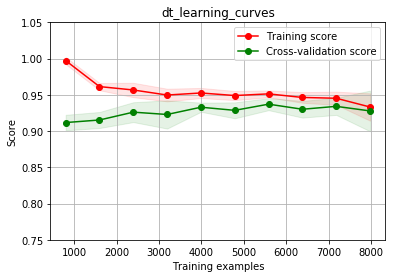

In [74]:
#learning curve for decision tree
dt=tree.DecisionTreeClassifier(criterion= 'gini',max_depth= 16,max_features= 'log2',min_samples_split= 0.001,min_weight_fraction_leaf= 0.001)
plot_learning_curve(estimator=dt,title='dt_learning_curves',X=full_train_x,y=train_y,ylim=(0.75,1.05),cv=5)

In [75]:
#learning curve seems ok....fitting dt with best parameters
dt=tree.DecisionTreeClassifier(criterion= 'gini',max_depth= 16,max_features= 'log2',min_samples_split= 0.001,min_weight_fraction_leaf= 0.001)
dt.fit(full_train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.001,
                       min_weight_fraction_leaf=0.001, presort=False,
                       random_state=None, splitter='best')

In [76]:
#predicting validation labels
dt_prediction_val=dt.predict(full_val_x)

In [77]:
#getting classification report for decision tree
print('Decision tree classification report\n\n')
print(classification_report(val_y,dt_prediction_val))

Decision tree classification report


              precision    recall  f1-score   support

    Employed       0.96      0.98      0.97      1614
        Left       0.93      0.87      0.90       523

    accuracy                           0.95      2137
   macro avg       0.94      0.92      0.93      2137
weighted avg       0.95      0.95      0.95      2137



## RF-Random Forest

In [78]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [79]:
#creating parameter grid for random search
grid_forest_1={'criterion':['gini','entropy'],
      'n_estimators':np.arange(5,200,1),
      'max_depth':np.arange(5,20,1),
      'min_samples_split':np.arange(0.001,0.1,0.01),
      'max_features':['log2','sqrt','auto'],    
      'min_weight_fraction_leaf':np.arange(0.001,0.25,0.05)
}

In [80]:
#getting best parameters form random search
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=grid_forest_1,n_iter=500,n_jobs=-1,cv=5,verbose=1)

In [81]:
rf_random.fit(full_train_x,train_y)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 207 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 807 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1257 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1807 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 2457 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 12.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [82]:
rf_random.best_params_

{'n_estimators': 154,
 'min_weight_fraction_leaf': 0.001,
 'min_samples_split': 0.001,
 'max_features': 'sqrt',
 'max_depth': 18,
 'criterion': 'entropy'}

In [83]:
grid_forest_2={'criterion':['entropy'],
      'n_estimators':np.arange(115,135,2),
      'max_depth':(17,18,19,20,21),
      'min_samples_split':np.arange(0.001,0.01,0.005),
      'max_features':['log2'],    
      'min_weight_fraction_leaf':np.arange(0.0001,0.1,0.005)
}

In [84]:
rf=RandomForestClassifier()
grid_search_rf=GridSearchCV(estimator=rf,param_grid = grid_forest_2,cv=3,n_jobs=-1,verbose=1)

In [85]:
grid_search_rf.fit(full_train_x,train_y)
grid_search_rf.best_params_

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 44.5min finished


{'criterion': 'entropy',
 'max_depth': 18,
 'max_features': 'log2',
 'min_samples_split': 0.001,
 'min_weight_fraction_leaf': 0.0001,
 'n_estimators': 129}

In [86]:
rf=RandomForestClassifier(criterion='entropy',max_depth= 17,max_features='log2',min_samples_split= 0.001,min_weight_fraction_leaf= 0.001,n_estimators= 129)
rf.fit(full_train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=17, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.001,
                       min_weight_fraction_leaf=0.001, n_estimators=129,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

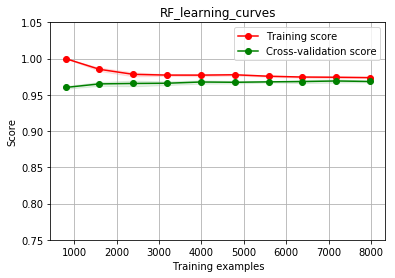

In [87]:
plot_learning_curve(estimator=rf,title='RF_learning_curves',X=full_train_x,y=train_y,ylim=(0.75,1.05),cv=5)

In [88]:
rf_predictions_val_y=rf.predict(full_val_x)

In [89]:
print(classification_report(val_y,rf_predictions_val_y))

              precision    recall  f1-score   support

    Employed       0.97      0.99      0.98      1614
        Left       0.97      0.89      0.93       523

    accuracy                           0.97      2137
   macro avg       0.97      0.94      0.96      2137
weighted avg       0.97      0.97      0.97      2137



## Gradient Boosting Classifier

In [90]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)>

In [91]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [92]:
param_grid_gbc_1={
    'n_estimators':np.arange(50,200,10),
    'learning_rate':np.arange(0.01,0.3,0.01),
    'subsample':np.arange(0.5,1.0,0.1),
    'max_depth':np.arange(2,7,1),
    'max_features':['sqrt','log2'],
    'verbose':[1]
}

In [93]:
random_gbc=RandomizedSearchCV(estimator=gbc,param_distributions=param_grid_gbc_1,n_jobs=-1,n_iter=1000,verbose=1)

In [94]:
random_gbc.fit(full_train_x,train_y)
random_gbc.best_params_

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 22.5min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.8866           0.2173            1.24s
         2           0.7997           0.0854            1.34s
         3           0.7257           0.0693            1.37s
         4           0.6185           0.1081            1.43s
         5           0.5526           0.0561            1.43s
         6           0.4931           0.0624            1.44s
         7           0.4529           0.0408            1.44s
         8           0.4144           0.0375            1.44s
         9           0.3887           0.0281            1.44s
        10           0.3592           0.0256            1.44s
        20           0.2231           0.0045            1.35s
        30           0.1847           0.0004            1.21s
        40           0.1538          -0.0032            1.10s
        50           0.1310           0.0018            1.00s
        60           0.1159           0.0003            0.91s
       

{'verbose': 1,
 'subsample': 0.8999999999999999,
 'n_estimators': 160,
 'max_features': 'sqrt',
 'max_depth': 6,
 'learning_rate': 0.19}

In [98]:
#searching for better parameters in random search with grid search
param_grid_gbc_2={'learning_rate':np.arange(0.1,0.2,0.05),
 'max_depth': (5,6,7,8),
 'max_features': ['log2'],
 'n_estimators': np.arange(158,162,1),
 'subsample': np.arange(0.8,0.9,0.02),
}

In [99]:
grid_search_gbc=GridSearchCV(estimator=gbc,param_grid=param_grid_gbc_2,n_jobs=-1,cv=3,verbose=1)

In [100]:
grid_search_gbc.fit(full_train_x,train_y)
grid_search_gbc.best_params_

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  9.5min finished


{'learning_rate': 0.15000000000000002,
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 161,
 'subsample': 0.8}

In [101]:
gradient_boosting=GradientBoostingClassifier(learning_rate= 0.15,max_depth= 8,max_features= 'log2',n_estimators= 161,subsample= 0.8)


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

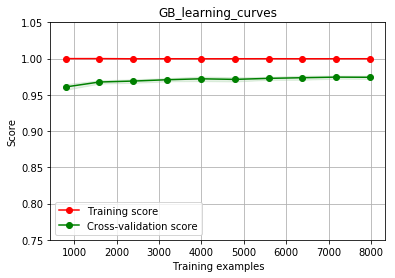

In [102]:
#plotting learning curves
plot_learning_curve(estimator=gradient_boosting,title='GB_learning_curves',X=full_train_x,y=train_y,ylim=(0.75,1.05),cv=5)

In [103]:
gradient_boosting.fit(full_train_x,train_y)
gb_prediction_val=gradient_boosting.predict(full_val_x)

In [104]:
print('gradient boosting classification report\n\n')
print(classification_report(val_y,gb_prediction_val))

gradient boosting classification report


              precision    recall  f1-score   support

    Employed       0.98      0.99      0.99      1614
        Left       0.98      0.93      0.96       523

    accuracy                           0.98      2137
   macro avg       0.98      0.96      0.97      2137
weighted avg       0.98      0.98      0.98      2137



In [105]:
score_df=pd.DataFrame({' ':['Employeed','Left'],'KNN-f1_score':[0.97,0.90],'Decision Tree-f1_score':[0.9,0.90],'Random_forest-f1_score':[0.98,0.93],'Gradient_boosting-f1_score':[0.99,0.96]})

In [106]:
score_df

,,KNN-f1_score,Decision Tree-f1_score,Random_forest-f1_score,Gradient_boosting-f1_score
0,Employeed,0.97,0.9,0.98,0.99
1,Left,0.90,0.9,0.93,0.96


In [107]:
#since we got same f1 scores on validation...choose random forest or gradient boosting for predictions